In this second part, we will create and train a MultiLayer Perceptron (MLP) and a Convolutional Neural Network (CNN) on the benchmark dataset MNIST.

In [51]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

import numpy as np

from matplotlib import pyplot as plt

Since it's a common dataset, MNIST can be found in the datasets module of keras (actually, it's only on tensorflow in some versions, so try to remove the `tf` part in the string below and see if it works for you)...

In [52]:
(mnist_train_images, mnist_train_labels), (mnist_validation_images, mnist_validation_labels) = tf.keras.datasets.mnist.load_data()
mnist_train_images.shape, mnist_train_labels.shape, mnist_validation_images.shape, mnist_validation_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Question**: what does this variable assignment mean?

```python
(mnist_train_images, mnist_train_labels), (mnist_validation_images, mnist_validation_labels) = ...
```

Let's proceed with querying the dataset first...

We use matplotlib for plotting the image here for two reasons:

1. We can add a title to the data (e.g., by adding the label)
2. PIL shows images on a 1:1 scale, thus a 28 x 28 image is too small to be seen well on a modern monitor. Matplotlib, instead, plots the images so that they are always at a "visible" scale

Text(0.5, 1.0, 'Label: 5')

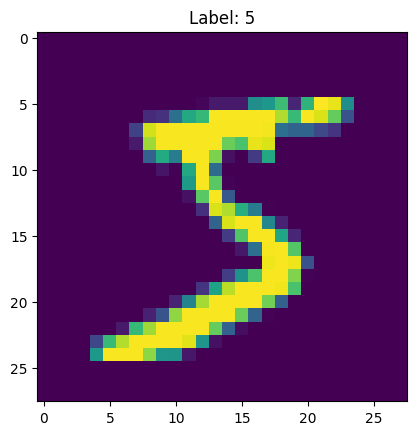

In [53]:
mnist_first_image = mnist_train_images[0]
mnist_first_label = mnist_train_labels[0]

plt.imshow(mnist_first_image)
plt.title(f'Label: {mnist_first_label}')

When plotting grayscale images (as it is the case with mnist), we should use the "gray" colormap for matplotlib, to avoid getting the weird purple-to-yellow color representation, which is not a faithful representation of the image.

Text(0.5, 1.0, 'Label: 5')

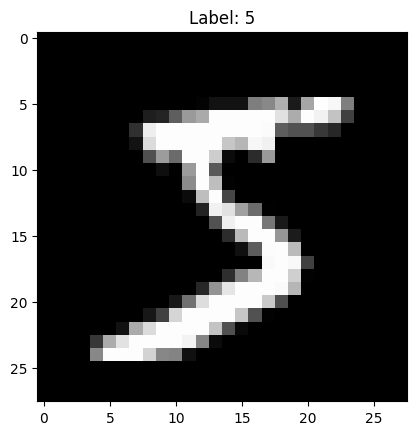

In [54]:
plt.imshow(mnist_first_image, cmap="gray")
plt.title(f'Label: {mnist_first_label}')

We have to normalize the data. **DIY**

In [60]:
mnist_train_images = mnist_train_images / 255.0
mnist_validation_images = mnist_validation_images / 255.0

We can finally construct the neural network. We can use the `Sequential` paradigm, which works by stacking up layers.

**Notice that `Sequential` only works when the information flows sequentially through a NN. If there is branching, we need to use other paradigms**

In [61]:
mlp = Sequential()

mlp.add(keras.layers.Flatten(input_shape=(28, 28)))
mlp.add(Dense(32, activation='relu', input_shape=(784,)))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(10, activation='softmax'))

mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Before training, we need to **compile** the model, by specifying an optimizer and loss function. Optionally, we can also list evaluation metrics to monitor them during training.

In [62]:
mnist_train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
mlp.fit(mnist_train_images, mnist_train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.3379 - accuracy: 0.9027
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1687 - accuracy: 0.9502
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1312 - accuracy: 0.9607
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1093 - accuracy: 0.9668
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0925 - accuracy: 0.9715


In [65]:
32*1875

60000

This refers only to the training metrics. To get the validation performance, we call `evaluate`

In [64]:
mlp.evaluate(mnist_validation_images, mnist_validation_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.1059 - accuracy: 0.9665


[0.10590681433677673, 0.9664999842643738]

**Question**: the method above requires to pass images and labels. At deployment time, however, we might not have labels. What can we do in this case?

Experiment with it...

In [66]:
predictions = mlp.predict(mnist_validation_images)

313/313 [==============================] - 3s 10ms/step


In [67]:
predictions.shape

(10000, 10)

In [75]:
predictions[-1]

array([1.31288445e-07, 5.20436229e-11, 3.36993850e-07, 7.14753867e-10,
       1.32237744e-06, 1.11220436e-06, 9.99997139e-01, 1.11377955e-10,
       2.04700168e-08, 4.96241503e-13], dtype=float32)

In [74]:
predictions[-1].max(), predictions[-1].argmax()

(0.99999714, 6)

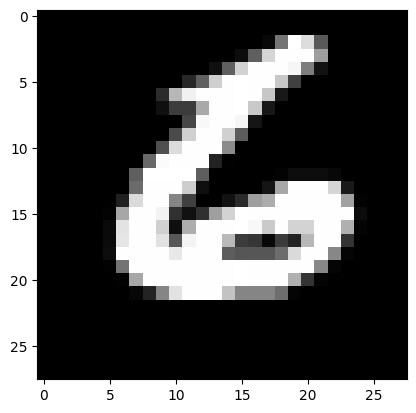

In [73]:
plt.imshow(mnist_validation_images[-1], cmap="grey")

In [ ]:
keras.losses.s

Next, we can build a cnn to train on MNIST. This is the architecture we will reproduce

In [78]:
cnn = Sequential()

cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding="same"))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(keras.layers.GlobalAveragePooling2D())
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 global_average_pooling2d_3   (None, 64)              

In [77]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(mnist_train_images, mnist_train_labels, epochs=2)
cnn.evaluate(mnist_validation_images, mnist_validation_labels)

Epoch 1/2
1875/1875 [==============================] - 71s 37ms/step - loss: 0.2812 - accuracy: 0.9122
Epoch 2/2
313/313 [==============================] - 3s 10ms/step - loss: 0.0570 - accuracy: 0.9815


[0.056975364685058594, 0.9815000295639038]

We can try to experiment with this model by creating our data:

(28, 28)


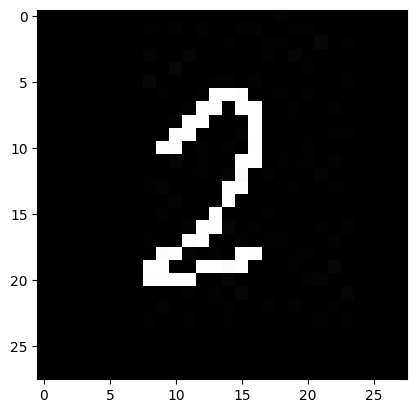

In [87]:
from PIL import Image

testimg = Image.open("mnist/2.jpg")
testimg = testimg.convert("L")

print(testimg.size)
plt.imshow(testimg, cmap="gray")

In [88]:
type(testimg)

PIL.Image.Image

**DIY**

* convert the image to a numpy array
* set it up in the right format for being evaluated by the CNN (tip: batches) 
* generate a prediction

In [89]:
testimg_array = np.array(testimg) / 255.0
testimg_array = np.expand_dims(testimg_array, axis=0)
pred = cnn.predict(testimg_array)

1/1 [==============================] - 0s 30ms/step


In [90]:
pred.argmax()

3

**Question**: what is the format of the prediction? How can we convert it to a number?

Now that we have finished training the model, we can save it. **TIPS**:

1. Remember to save a model after training
2. Be careful that the `save` method **overwrites by default**. If you are training multiple models, be careful about the names
3. **Check that the folders for saving a model exist before training**. If the folder does not exist, the saving will fail

In [92]:
cnn.save("models/mnist_cnn.h5")

**DIY**: implement a residual layer using the functional interface

![](imgs/residual.png)

